In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))

class Linear:
  def __init__(self,input_size,output_size):
    self.W = np.random.normal(0,1,(input_size,output_size))
    self.dW = np.zeros_like(self.W)
    self.input_size = input_size
    self.output_size = output_size
    self.delta_W = np.zeros_like(self.W )

    
  def forward(self,X):
    self.output = np.dot(X,self.W)
    self.X = X
    return self.output

  def backward(self,grad):
    self.dW += np.dot(self.X.reshape(self.input_size,1),grad.reshape(1,self.output_size))
    dX = np.dot(self.W,grad,)
    return dX

  def update_weights(self,learn_rate):
    self.W = self.W - learn_rate * self.dW
    self.W -= 0.5*self.delta_W      #метод моментов 
    self.delta_W = -learn_rate * self.dW
    self.dW.fill(0.)


class Sigmoid:

  def __init__(self):
    pass

  def forward(self,X):
    self.output = sigmoid(X)
    self.X = X
    return self.output

  def backward(self,grad):
    dX = self.output * (1-self.output)*grad
    return dX

  def update_weights(self,learn_rate):
    pass

class Model:
    def __init__(self,input):
      self.output = input
      self.layers = []

    def Linear(self,count,activation = True):
      self.layers.append(Linear(self.output,count))
      self.output = count
      if activation:
        self.layers.append(Sigmoid())

    def forward(self,input):
      for l in self.layers:
        input=l.forward(input)
      return input

    def backward(self,grad):
      for l in reversed(self.layers):
        # print(grad)
        grad=l.backward(grad)

    def update_weights(self,learn_rate):
      for l in self.layers:
        l.update_weights(learn_rate)

def get_loss(nn, test_dataset,true_label):
    Loss = np.zeros_like(true_label[0])
    for i,v in enumerate(test_dataset):
      input =np.nan_to_num(v)
      y_pred = nn.forward(input)
      y_true = true_label[i]
      Loss += np.nan_to_num((y_pred-y_true)**2/test_dataset.shape[0])
    return Loss

def train(nn, train_dataset,true_label,learn_rate,num_epoch): 
  train_num = train_dataset.shape[0]
  Loss_list = []
  test_loss_list = []
  for j in range(num_epoch):
    order = np.random.permutation(train_num) #порядок обхода
    Loss = np.zeros_like(true_label[0])
    for i in order:
      input =np.nan_to_num(train_dataset[i])
      y_pred = nn.forward(input)
      y_true = true_label[i]
      Loss += np.nan_to_num((y_pred-y_true)**2/train_num)
      dLoss =  np.nan_to_num(2*(y_pred-y_true)/train_num)
      nn.backward(dLoss)
    nn.update_weights(learn_rate)
    learn_rate = learn_rate*0.9999
    if (j % 100 == 0):
      print('epoch ',j,' finished with Loss: ',Loss)
    Loss_list.append(Loss)
    
  for j in range(Loss_list[0].size):
    print('Loss#',j)
    plot = []
    for i in range(len(Loss_list)):
      if i > 20:
        plot.append(Loss_list[i][j])
    fig, ax = plt.subplots()
    x = np.arange(len(plot))
    ax.plot(x, plot, label = 'train')
    ax.legend()
    plt.show()

# Новый раздел

epoch  0  finished with Loss:  [3.12213703 6.1708034 ]
epoch  100  finished with Loss:  [0.02116524 0.07207499]
epoch  200  finished with Loss:  [0.01992329 0.06655255]
epoch  300  finished with Loss:  [0.01902332 0.06113139]
epoch  400  finished with Loss:  [0.0178686  0.05275451]
epoch  500  finished with Loss:  [0.01645244 0.04604226]
epoch  600  finished with Loss:  [0.01533549 0.04059486]
epoch  700  finished with Loss:  [0.01450853 0.03472722]
epoch  800  finished with Loss:  [0.01373645 0.0293516 ]
epoch  900  finished with Loss:  [0.01286214 0.02539499]
epoch  1000  finished with Loss:  [0.0119714  0.02275987]
epoch  1100  finished with Loss:  [0.01117057 0.02095015]
epoch  1200  finished with Loss:  [0.01047951 0.01960133]
epoch  1300  finished with Loss:  [0.00988056 0.01852112]
epoch  1400  finished with Loss:  [0.00935458 0.01761561]
epoch  1500  finished with Loss:  [0.00888801 0.01683638]
epoch  1600  finished with Loss:  [0.00847144 0.01615504]
epoch  1700  finished with

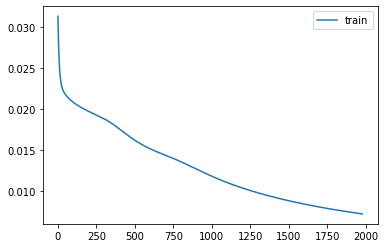

Loss# 1


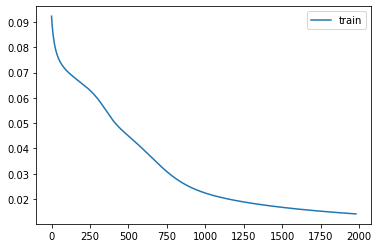

G-total


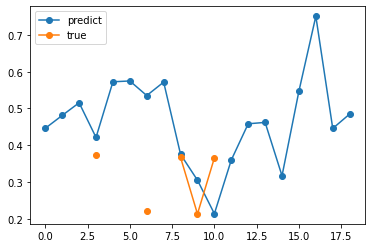

KGF


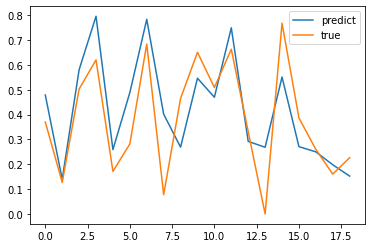

In [53]:
df = pd.read_csv('/content/data.csv',sep=';', encoding = 'windows-1251')
arr = df.to_numpy()
for i in range(arr.shape[1]):     #Нормируем все колонки [0,1] (от выбросов избавились)
  max = np.nanmax(arr[:,i])
  min = np.nanmin(arr[:,i])
  for j in range(arr.shape[0]):
    arr[j,i]=(arr[j,i]-min)/(max-min)


num = arr.shape[0]
vect_len = arr.shape[1]-2

train_num = int(0.8*num)
np.random.shuffle(arr)
train_dataset = arr[:train_num]
test_dataset = arr[train_num:]

perceptron = Model(vect_len)
perceptron.Linear(70)
perceptron.Linear(40)
perceptron.Linear(2,activation = False)
train(perceptron,train_dataset[:,:-2],train_dataset[:,-2:],0.1,2000)
  


pred_G_total = np.zeros_like(test_dataset[:,-2])
pred_KGF = np.zeros_like(test_dataset[:,-1])
for i,v in enumerate(test_dataset):
  input =np.nan_to_num(v[:-2])
  y_pred = perceptron.forward(input)
  y_true = v[-2:]
  pred_G_total[i] = y_pred[0]
  pred_KGF[i] = y_pred[1]
  err = np.nan_to_num((y_pred-y_true)**2)
x = np.arange(test_dataset.shape[0])
print('G-total')
fig, ax = plt.subplots()
ax.plot(x, pred_G_total, label = 'predict', marker='o')
ax.plot(x, test_dataset[:,-2], label = 'true', marker='o')
ax.legend()
plt.show()
print('KGF')
fig, ax = plt.subplots()
ax.plot(x, pred_KGF, label = 'predict')
ax.plot(x, test_dataset[:,-1], label = 'true')
ax.legend()
plt.show()


epoch  0  finished with Loss:  [3.85414261]
epoch  100  finished with Loss:  [0.13037149]
epoch  200  finished with Loss:  [0.05857095]
epoch  300  finished with Loss:  [0.04037997]
epoch  400  finished with Loss:  [0.03155126]
epoch  500  finished with Loss:  [0.02604903]
epoch  600  finished with Loss:  [0.02308406]
epoch  700  finished with Loss:  [0.71140709]
epoch  800  finished with Loss:  [0.03705112]
epoch  900  finished with Loss:  [0.01850713]
epoch  1000  finished with Loss:  [0.01678316]
epoch  1100  finished with Loss:  [0.01566468]
epoch  1200  finished with Loss:  [0.01481513]
epoch  1300  finished with Loss:  [0.01415298]
epoch  1400  finished with Loss:  [0.01364894]
epoch  1500  finished with Loss:  [0.01351849]
epoch  1600  finished with Loss:  [0.01855098]
epoch  1700  finished with Loss:  [0.12238974]
epoch  1800  finished with Loss:  [0.10865938]
epoch  1900  finished with Loss:  [0.02017426]
Loss# 0


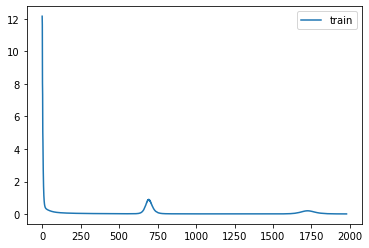

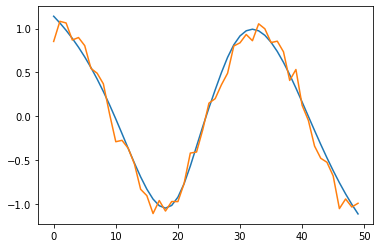

In [20]:
#Попытка апроксимировать синус
noise_level = 0.1
X_train_ = np.arange(-5, 5, 0.2)
real_sin = np.sin(X_train_)
y_train = real_sin+np.random.normal(0,noise_level,len(X_train_))    
X_train_ = X_train_.reshape((X_train_.size,1))
y_train = y_train.reshape((y_train.size,1))

perceptron = Model(1)
perceptron.Linear(32)
perceptron.Linear(32)
perceptron.Linear(1,activation = False)



train(perceptron,X_train_,y_train,0.05,2000)
predicted_sin = []
for i in X_train_:
  predicted_sin.append(perceptron.forward(i))
plt.plot(predicted_sin)
plt.plot(y_train)
plt.show()